In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Center and Standard Deviation

0-10 mins

In [7]:
births = Table.read_table('http://inferentialthinking.com/notebooks/baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


Which is bigger, mean or median?

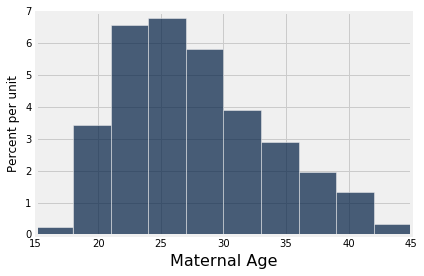

In [3]:
births.hist(2)

In [4]:
values = births.column(2)

In [5]:
np.average(values)

27.228279386712096

In [6]:
np.median(values)

26.0

In [9]:
np.std(values)

5.8153604041908968

Discussion question: Which has a higher std dev?

In [ ]:
births.hist('Birth Weight')

In [ ]:
births.hist('Maternal Age')

In [23]:
np.std(births.column('Birth Weight'))

18.320863702202779

In [22]:
np.std(births.column('Maternal Age'))

5.8153604041908968

## Chebyshev

10-20 mins

In [30]:
avg = np.mean(births.column('Maternal Age'))
sd = np.std(births.column('Maternal Age'))

In [31]:
births.where(2, are.between(avg-2*sd, avg+2*sd)).num_rows / births.num_rows

0.948892674616695

In [32]:
births.where(2, are.between(avg-3*sd, avg+3*sd)).num_rows / births.num_rows

0.9991482112436116

In [ ]:
births.hist(bins=10, overlay=False)

In [ ]:
for k in np.arange(6):
    values = births.column(k)
    avg = np.average(values)
    sd = np.std(values)
    print('Column', k)
    for z in np.arange(1, 4):
        within = births.where(k, are.between(avg-z*sd, avg+z*sd))
        print('Average +/-', z, 'SD:',  within.num_rows / births.num_rows)
    print()

## Standard Units

20-35 mins

In [35]:
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


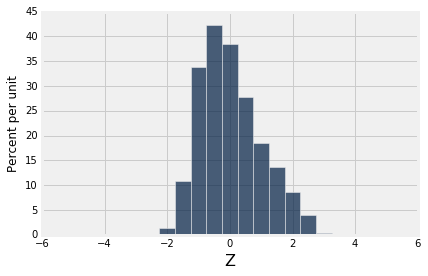

In [36]:
k = 2
values = births.column(k)
avg = np.average(values)
sd = np.std(values)
z = (values-avg) / sd
t = Table().with_column('Values', values, 'Z', z)
t.hist(1, bins=np.arange(-5.25, 5.5, 0.5))

## The Normal Distribution

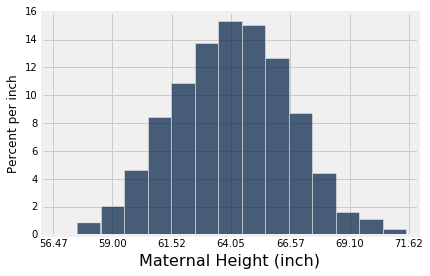

In [37]:
births.hist(3, bins=np.arange(57.5, 72, 1), unit='inch')
avg = np.average(births.column(3))
sd = np.std(births.column(3))
_ = plt.xticks(avg + np.arange(-3, 4, 1) * sd)

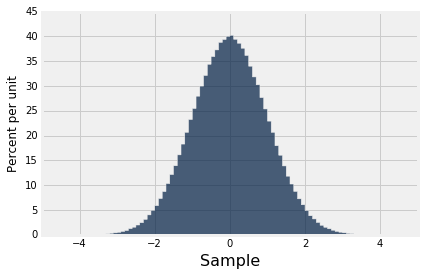

In [38]:
samples = []
for i in np.arange(1e6):
    samples.append(np.random.normal())
Table().with_column('Sample', samples).hist(bins=np.arange(-4.5, 4.6, .1))

## Central Limit Theorem

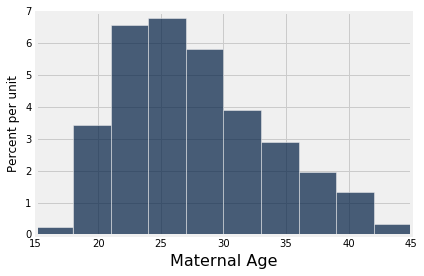

In [39]:
births.hist(2)

In [40]:
births.column(2).mean()

27.228279386712096

In [41]:
births.sample().column(2).mean()

27.254684838160138

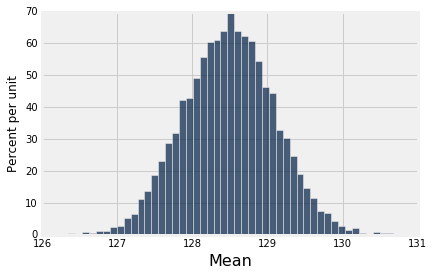

In [42]:
means = []
for i in np.arange(1e4):
    means.append(births.sample().column(4).mean())
Table().with_column('Mean', means).hist(bins=50)